# ROC curves, AUC (area under the curve) and MCC (Matthews' correlation coefficient)

In this notebook, we illustrate how to:

1. draw the ROC curve
2. calculate the AUC (area under the curve)
3. claculate the MCC (Matthew's correlation coefficient)

## Loading libraries

First of all, we load some necessary libraries

In [40]:
import numpy as np
import pandas as pd

## Get the data

Example data

In [41]:
DATASET_URL = 'https://raw.githubusercontent.com/ne1s0n/bioinformateachers/refs/heads/main/dlb/data/predictions.csv'

In [42]:
bc_data = pd.read_csv(DATASET_URL)
bc_data.head()

,y_test,y_pred,prob_0,prob1
0,1.0,1.0,0.013791,0.986209
1,1.0,1.0,0.022589,0.977411
2,1.0,1.0,0.340036,0.659964
3,0.0,0.0,0.999988,0.000012
4,1.0,1.0,0.029998,0.970002


In [43]:
len(bc_data)

114

In [44]:
y_test = np.array(bc_data['y_test'])
y_pred = np.array(bc_data['y_pred'])

In [45]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[34,  7],
       [ 4, 69]])

In [46]:
y_probs = np.array(bc_data[bc_data.columns[2:4]])

In [47]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [48]:
y_probs[:,1].shape

(114,)

In [49]:
fpr, tpr, _ = roc_curve(y_test, y_probs[:,1])

In [50]:
roc_auc = auc(fpr, tpr)

In [51]:
roc_auc

0.9555629802873371

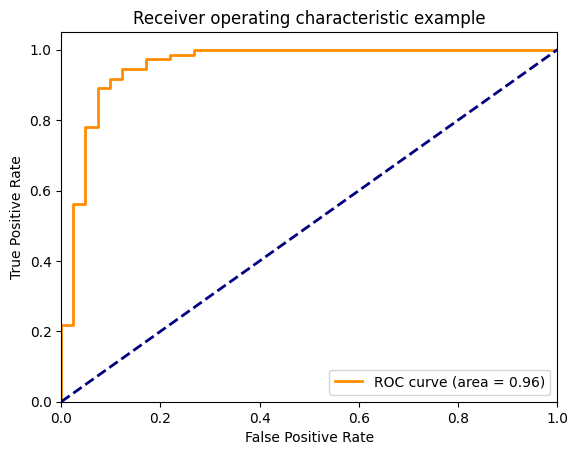

In [52]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

[TODO]